<a href="https://colab.research.google.com/github/AtharvaJ-236/Data-Science/blob/main/DS_Prac_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fifa_world_cup_matches.csv to Fifa_world_cup_matches.csv


In [2]:
import pandas as pd

df = pd.read_csv("Fifa_world_cup_matches.csv")
print(df.head())

           team1         team2 possession team1 possession team2  \
0          QATAR       ECUADOR              42%              50%   
1        ENGLAND          IRAN              72%              19%   
2        SENEGAL   NETHERLANDS              44%              45%   
3  UNITED STATES         WALES              51%              39%   
4      ARGENTINA  SAUDI ARABIA              64%              24%   

  possession in contest  number of goals team1  number of goals team2  \
0                    8%                      0                      2   
1                    9%                      6                      2   
2                   11%                      0                      2   
3                   10%                      1                      1   
4                   12%                      1                      2   

          date     hour category  ...  penalties scored team1  \
0  20 NOV 2022  17 : 00  Group A  ...                       0   
1  21 NOV 2022  14 : 0

In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

non_numeric_cols = [
    'team1', 'team2', 'date', 'hour', 'category'
]

percent_cols = ['possession team1', 'possession team2', 'possession in contest']

for col in percent_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('%', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')


numeric_df = df.drop(columns=non_numeric_cols, errors='ignore')

numeric_df = numeric_df.select_dtypes(include=['int64', 'float64'])

# Convert to NumPy array
X = numeric_df.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.99, whiten=True)
X_pca = pca.fit_transform(X_scaled)

print("Original feature count:", X_scaled.shape[1])
print("Reduced feature count (PCA):", X_pca.shape[1])
print("PCA explained variance ratio:", pca.explained_variance_ratio_)

Original feature count: 83
Reduced feature count (PCA): 42
PCA explained variance ratio: [0.31603734 0.08550979 0.07606615 0.05206648 0.05017646 0.03872175
 0.03601403 0.03112    0.02746983 0.0262163  0.02035938 0.01815456
 0.01744604 0.01630799 0.01458707 0.01357307 0.01279016 0.0124705
 0.01131921 0.01031394 0.00961071 0.00873259 0.00847893 0.00793134
 0.00713546 0.00644599 0.00620435 0.00538099 0.00523677 0.0047301
 0.00435507 0.00408357 0.0037059  0.00348005 0.0033464  0.00279245
 0.00269271 0.00220551 0.00212025 0.0020037  0.00191193 0.00182213]


In [7]:
from sklearn.decomposition import PCA, KernelPCA
kpca = KernelPCA(kernel="rbf", gamma=0.1, n_components=2)
X_kpca = kpca.fit_transform(X_scaled)

print("Original feature count:", X_scaled.shape[1])
print("Reduced feature count (Kernel PCA):", X_kpca.shape[1])

Original feature count: 83
Reduced feature count (Kernel PCA): 2


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
y = np.random.choice([0, 1], size=len(df))

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X_scaled, y).transform(X_scaled)

print("Reduced feature count (LDA):", X_lda.shape[1])
print("LDA explained variance ratio:", lda.explained_variance_ratio_)

Reduced feature count (LDA): 1
LDA explained variance ratio: [1.]


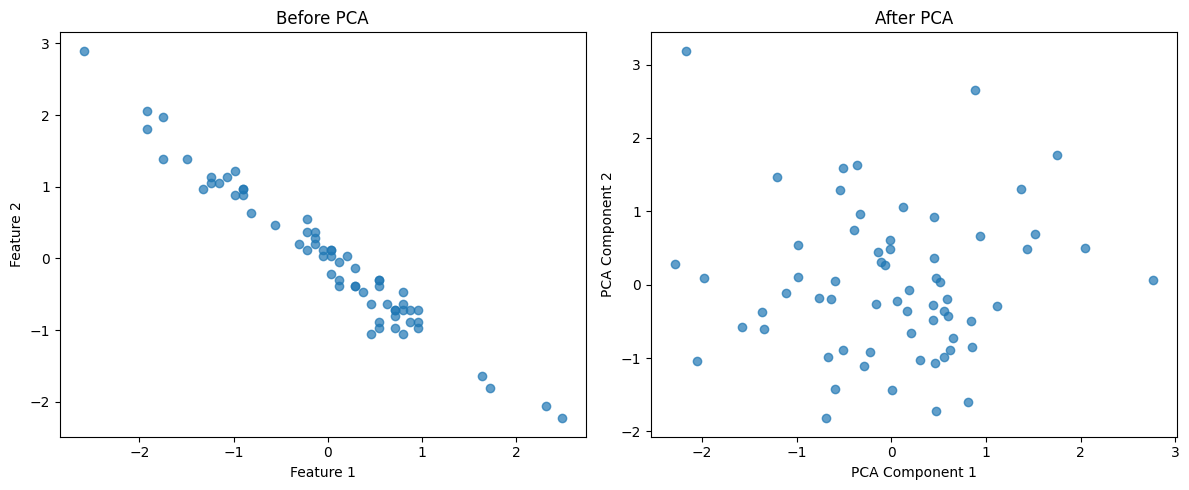

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.7)
plt.title("Before PCA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1,2,2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.title("After PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()